Перед анализом полезно посмотреть на данные глазами, то есть изучить их визуальное представление.
Существуют различные виды диаграмм, позволяющие представлять данные в графическом виде.

<img src="https://i.ibb.co/ZSMbPkZ/1.png" width=500>

### **Инструментальные средства визуализации в Python**

Библиотека **matplotlib** является одним из самых популярных средств
визуализации данных на Python. Она отлично подходит как для создания
статичных изображений, так и анимированных, и интерактивных
решений.

<img src="https://matplotlib.org/stable/_static/images/logo2.svg" width=500>

Библиотека **seaborn** — это библиотека для решения задач визуализации с
ориентацией на работу в области статистики, основанная на библиотеке matplotlib.

<img src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" width=500>

Подробно о работе в этих библиотеках и различных аспектах визуализации с их помощью можно почитать в книге:

*Абдрахманов М.И. Python. Визуализация данных. Matplotlib. Seaborn. Mayavi. - devpractice.ru. 2020. - 412 с.*

In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# подключим библиотеки
import pandas as pd  # подключаем библиотеку pandas с псевдонимом pd
import numpy as np  # numpy тоже подключим на всякий случай, вдруг пригодится
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def set_graph_size(width=8, height=6):
  """Установка размеров изображения"""
  plt.rcParams["figure.figsize"] = width, height

### **Виды диаграмм**


**1. Диаграмма рассеяния** (точечная диаграмма, scatter plot).
Часто используется, чтобы показать зависимость между двумя величинами. Каждому наблюдению соответствует точка, координаты которой равны значениям двух каких-то параметров этого наблюдения. Если предполагается, что один из параметров зависит от другого, то обычно значения независимого параметра откладывается по оси X, а значения зависимого — по оси Y.

В простейшем случае по оси X откладываются порядковые номера показателя (первый, второй, третий… эти данные не несут содержательной
нагрузки, просто метки), по оси Y – значения показателя.

Диаграмма рассеяния может служить визуальным методом **выявления выбросов** (это точки, далеко отстоящие от основной массы наблюдений).

<img src="https://i.ibb.co/HqFf15x/1.png" width=400>

### Функция **scatter()**

In [6]:
# нарисуем подобную диаграмму - зависимость веса рюкзака студента от веса самого студента
# для этого подготовим данные

student_weight = [40, 46, 50, 53, 57, 60, 65, 70, 71, 76]  # вес студентов
backpack_weight = [3.8, 6, 5.1, 7, 14, 8.9, 8.1, 9.9, 3.5, 12.5]  # вес рюкзака студентов

# поместим данные в датафрейм
student_backpacks_df = pd.DataFrame({"student_weight": student_weight,
                                     "backpack_weight": backpack_weight},
                                    index=["Октябрина", "Алгебрина", "Даздраперма",
                                           "Искрина", "Sharon", "Антоний", "Антиохий",
                                           "John", "Brad", "Евкакий"])
student_backpacks_df

,student_weight,backpack_weight
Октябрина,40,3.8
Алгебрина,46,6.0
Даздраперма,50,5.1
Искрина,53,7.0
Sharon,57,14.0
Антоний,60,8.9
Антиохий,65,8.1
John,70,9.9
Brad,71,3.5
Евкакий,76,12.5


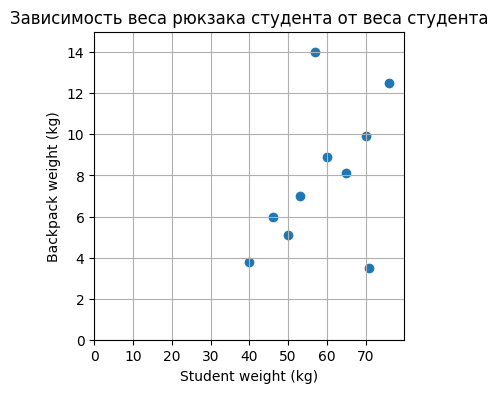

In [7]:
set_graph_size(4, 4)

# простейшая точечная диаграмма
plt.scatter(
    x=student_weight,  # ряд значений по оси X
    y=backpack_weight,  # ряд значений по оси Y
  )

# # положение осей и сетки (True - за основными фигурами, позади них)
plt.rcParams["axes.axisbelow"] = True
plt.grid()  # включение сетки

plt.xticks(range(0, 80, 10))  # значения меток на оси X
plt.yticks(range(0, 15, 2))  # значения меток на оси Y

plt.xlim(0, 80)  # ограничение диапазона оси X
plt.ylim(0, 15)  # ограничение диапазона оси Y

plt.ylabel("Backpack weight (kg)")  # подпись к оси Y
plt.xlabel("Student weight (kg)")  # подпись к оси X
plt.title("Зависимость веса рюкзака студента от веса студента");  # подпись ко всей диаграмме

In [ ]:
student_backpacks_df

,student_weight,backpack_weight
Октябрина,40,3.8
Алгебрина,46,6.0
Даздраперма,50,5.1
Искрина,53,7.0
Sharon,57,14.0
Антоний,60,8.9
Антиохий,65,8.1
John,70,9.9
Brad,71,3.5
Евкакий,76,12.5


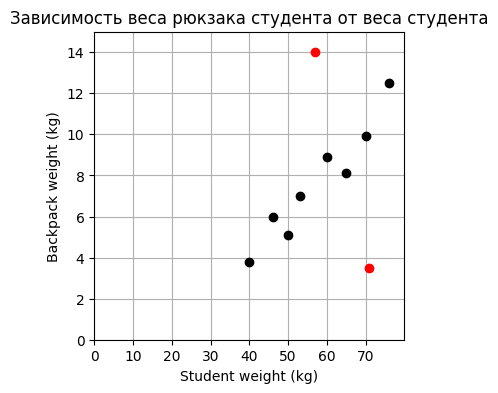

In [8]:
# выделим выбросы другим цветом

# графики на холсте можно комбинировать!

# наносим на плоскость точки без выбросов
plt.scatter(
    x=student_backpacks_df[~student_backpacks_df.index.str.contains("Brad|Sharon")].student_weight,
    y=student_backpacks_df[~student_backpacks_df.index.str.contains("Brad|Sharon")].backpack_weight,
    color="black"
  )

# наносим на плоскость выбросы
plt.scatter(
    x=student_backpacks_df[student_backpacks_df.index.str.contains("Brad|Sharon")].student_weight,
    y=student_backpacks_df[student_backpacks_df.index.str.contains("Brad|Sharon")].backpack_weight,
    color="red"
  )

plt.grid()
plt.xticks(range(0, 80, 10))
plt.yticks(range(0, 15, 2))
plt.xlim(0, 80)
plt.ylim(0, 15)
plt.ylabel("Backpack weight (kg)")
plt.xlabel("Student weight (kg)")
plt.title("Зависимость веса рюкзака студента от веса студента");

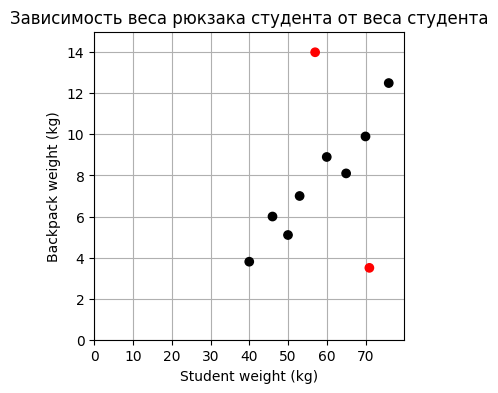

In [ ]:
# аргумент c функции scatter() - позволяет задавать разные цвета для разных значений
# если значениями являются названия цветов, эти цвета и используются
# scatter(..., c=["black", "black", "black", "green", "black", "yellow"])
# также значения можно задавать числовыми кодами цветов
plt.scatter(
    x=student_backpacks_df.student_weight,
    y=student_backpacks_df.backpack_weight,
    c=pd.Series(student_backpacks_df.index.str.contains("Brad|Sharon")).replace(
        {False: "black", True: "red"}
      )
  )
plt.grid()
plt.xticks(range(0, 80, 10))
plt.yticks(range(0, 15, 2))
plt.xlim(0, 80)
plt.ylim(0, 15)
plt.ylabel("Backpack weight (kg)")
plt.xlabel("Student weight (kg)")
plt.title("Зависимость веса рюкзака студента от веса студента");

**Стандартные цвета**

<img src="https://i.ibb.co/tQT6tr6/image.png" width=600>

**2. Полигон (многоугольник) частот.**
По оси X – значения показателя, по оси Y – частоты (сколько раз такое значение встречается в наборе данных).
Строится на основе **дискретного ряда (частотной таблицы)**.

<img src="https://i.ibb.co/q07F6Pn/1.png" width=300>

### Функция **plot()**

Дискретный ряд/частотная таблица

<img src="https://i.ibb.co/d08nbjf/1.png" width=400>

In [5]:
# подготовим данные
list_X = [10] * 5 + [20] * 8 + [50]
series_X = pd.Series(list_X)  # превратим список в серию
series_X.value_counts(sort=False)  # по умолчанию сортируется по убыванию частот, отключим сортировку

10    5
20    8
50    1
Name: count, dtype: int64

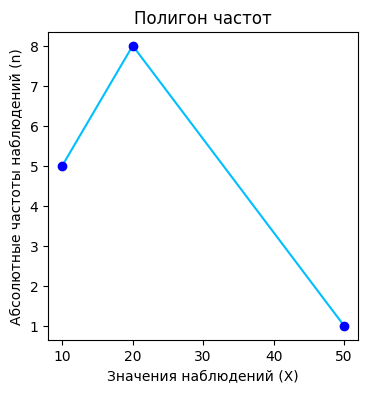

In [10]:
plt.plot(series_X.value_counts(sort=False).index,  # значения по оси X
         series_X.value_counts(sort=False),  # значения по оси Y
         color="deepskyblue", zorder=1)  # порядок отображения фигуры на холсте

# можно использовать серию - в качестве значений по оси X возьмутся индексы
# plt.plot(series_X.value_counts(sort=False),
#          color="deepskyblue")

# можно строить несколько графиков разных типов на одном холсте

# добавим на холст точечную диаграмму
plt.scatter(x=series_X.value_counts(sort=False).index,
            y=series_X.value_counts(sort=False), color="blue",
            zorder=2)

plt.ylabel("Абсолютные частоты наблюдений (n)")  # подпись к оси Y
plt.xlabel("Значения наблюдений (X)")  # подпись к оси X
plt.title("Полигон частот");

**3. Столбчатая диаграмма.**
Это диаграмма, представленная прямоугольными зонами (столбцами), высоты или длины которых пропорциональны величинам, которые они отображают. Столбцы могут быть расположены вертикально или горизонтально.

Столбчатая диаграмма отображает сравнение нескольких дискретных категорий. Одна её ось показывает сравниваемые категории, другая — измеримую величину. Иногда столбчатые диаграммы отображают несколько величин для каждой сравниваемой категории.

<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/%D0%94%D0%B8%D0%BD%D0%B0%D0%BC%D0%B8%D0%BA%D0%B0_%D1%87%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_%D1%81_1800_%D0%BF%D0%BE_2012_%D0%B3%D0%B3..png" width=600>

### Функции **bar()**, **barh()**

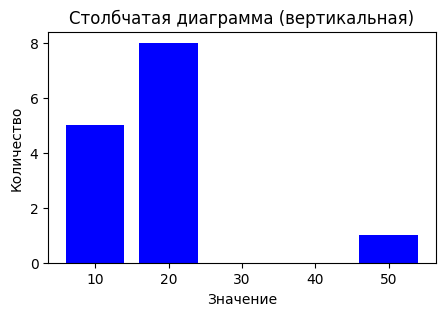

In [11]:
set_graph_size(5, 3)

# вертикальный barplot
plt.bar(series_X.value_counts().index,  # значения по оси X
        height=series_X.value_counts(),  # высоты столбцов (значения по оси Y)
        width=8,  # ширина столбца
        color="blue")
plt.ylabel("Количество")
plt.xlabel("Значение")
plt.title("Столбчатая диаграмма (вертикальная)");

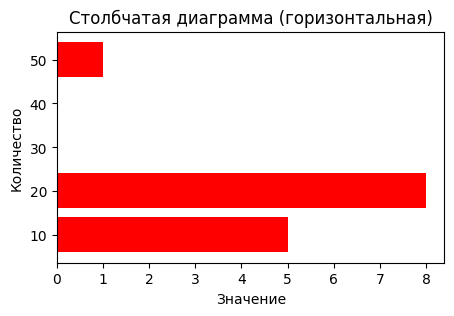

In [ ]:
# горизонтальный barplot
plt.barh(series_X.value_counts().index,  # значения по оси Y
         width=series_X.value_counts(),  # ширина (длина?) столбцов (значения по оси X)
         height=8,  # высота (толщина?) горизонтального столбца
         color="red")
plt.ylabel("Количество")
plt.xlabel("Значение")
plt.title("Столбчатая диаграмма (горизонтальная)");

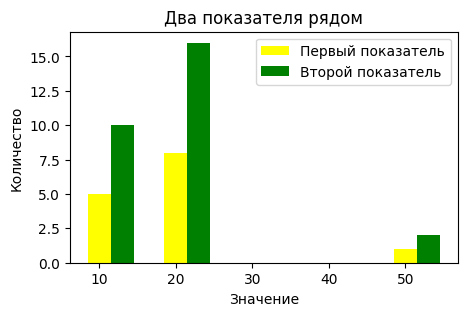

In [ ]:
# несколько показателей рядом
plt.bar(series_X.value_counts().index,
        height=series_X.value_counts(),
        width=3,
        color="yellow", label="Первый показатель")
plt.bar(series_X.value_counts().index + 3,
        height=series_X.value_counts() * 2,
        width=3,
        color="green", label="Второй показатель")
plt.ylabel("Количество")
plt.xlabel("Значение")
plt.title("Два показателя рядом")
plt.gca().legend();

**4. Гистограмма частот.**
Отличие от полигона – по оси X не конкретные значения показателя, а диапазоны (интервалы) его значений.
По оси Y – частоты, с которыми попадают значения в тот или иной интервал (высота столбцов). Строится на основе **интервального ряда**.

<img src="https://i.ibb.co/2N9r3Cg/1.png" width=400>

### Функция **hist()** (библиотека matplotlib)

Интервальный ряд

<img src="https://i.ibb.co/X8V6bKh/1.png" width=500>

In [2]:
series_intervals = pd.Series([10, 12, 13, 15, 19, 21, 22, 22, 24, 24, 25, 26, 29, 50])
series_intervals.value_counts(bins=4, sort=False)

(9.959000000000001, 20.0]    5
(20.0, 30.0]                 8
(30.0, 40.0]                 0
(40.0, 50.0]                 1
Name: count, dtype: int64

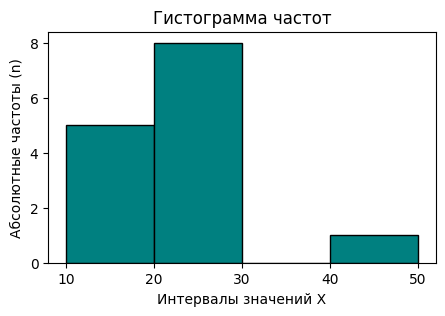

In [14]:
plt.hist(series_intervals,  # данные
         bins=4,  # количество интервалов (столбцов)
         color="teal",  # цвет столбца
         linewidth=1,  # толщина границ столбца
         edgecolor="black")  # цвет границ столбца

plt.xticks([10, 20, 30, 40, 50])

plt.ylabel("Абсолютные частоты (n)")
plt.xlabel("Интервалы значений X")
plt.title("Гистограмма частот");

### Функция **histplot()** (библиотека seaborn)

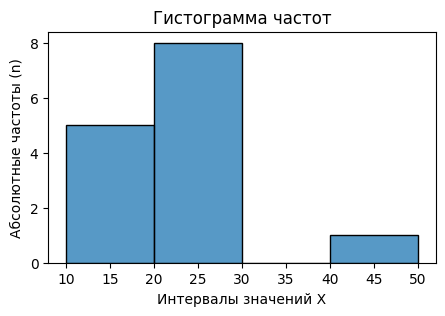

In [15]:
sns.histplot(series_intervals, bins=4)
plt.ylabel("Абсолютные частоты (n)")
plt.xlabel("Интервалы значений X")
plt.title("Гистограмма частот");

**5. График функции плотности.**
Функция плотности вероятности непрерывной случайной величины – это функция, про которую грубо можно сказать, что она характеризует вероятность, с которой случайная величина 𝑋 принимает некоторое значение 𝑥. График плотности вероятности несколько похож на полигон частот и гистограмму.

<img src="https://i.ibb.co/ZWdKJGR/1.png" width=300>

Часто кривую плотности накладывают на гистограмму:

<img src="https://i.ibb.co/j3s76Zz/1.png" width=300>

Ядерная оценка плотности (англ. **Kernel Density Estimation**, KDE) - непараметрический способ оценки плотности случайной величины. Используется при визуализации кривой плотности конечной выборки.

### Построение средствами **matplotlib + pandas**

In [ ]:
# сгенерируем выборку из нормального распределения объемом 1000 наблюдений
norm_sample = pd.Series(np.random.normal(size=1000, loc=10, scale=5))

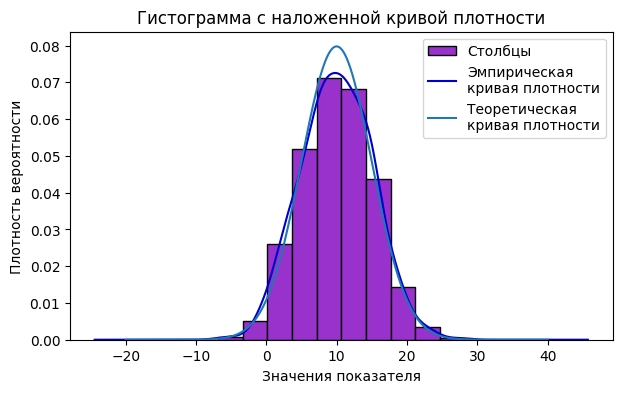

In [ ]:
set_graph_size(7, 4)

# построим гистограмму
plt.hist(norm_sample, bins=10,
         density=True,  # если True, по оси Y будут значения оценки плотности
         color="darkorchid", linewidth=1, edgecolor="black",
         label="Столбцы")
# наложим на нее эмпирическую кривую плотности (оценку, полученную по данным)
norm_sample.plot.density(color="mediumblue", label="Эмпирическая\nкривая плотности")

# # наложим для сравнения теоретическую кривую плотности нормального распределения
import scipy.stats as stats
norm_range = np.linspace(-20, 40, 1000)
plt.plot(norm_range, stats.norm.pdf(norm_range, loc=10, scale=5),
         label="Теоретическая\nкривая плотности")

plt.gca().legend()
plt.ylabel("Плотность вероятности")  # подпись к оси Y
plt.xlabel("Значения показателя")  # подпись к оси X
plt.title("Гистограмма с наложенной кривой плотности");

### Построение средствами **seaborn**

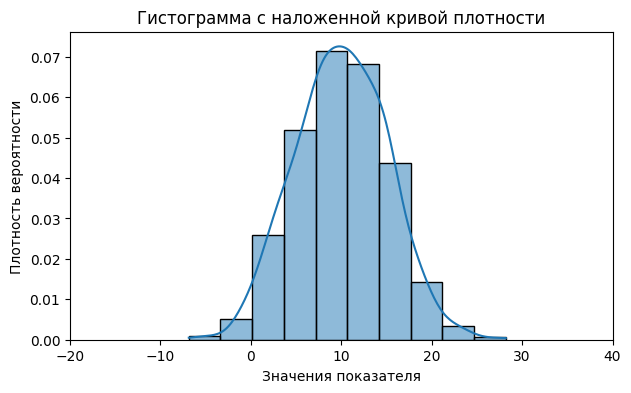

In [ ]:
sns.histplot(norm_sample, bins=10,
             kde=True,  # True - включает отображение кривой плотности
             stat="density"  # по оси Y будут значения оценки плотности
             )
plt.xlim([-20, 40])
plt.ylabel("Плотность вероятности")  # подпись к оси Y
plt.xlabel("Значения показателя")  # подпись к оси X
plt.title("Гистограмма с наложенной кривой плотности");

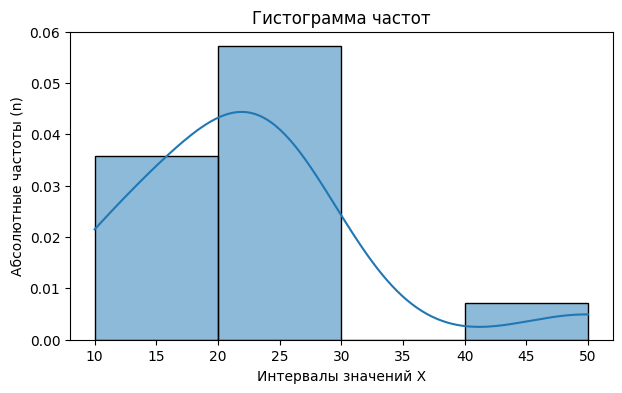

In [ ]:
# на нашем интервальном ряде
sns.histplot(series_intervals, bins=4, kde=True, stat="density")
plt.ylabel("Абсолютные частоты (n)")
plt.xlabel("Интервалы значений X")
plt.title("Гистограмма частот");

**6. Ящик с усами (boxplot).**
Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.
Несколько таких ящиков можно поместить рядом, чтобы визуально сравнивать распределение одного набора данных с другим; их можно располагать как горизонтально, так и вертикально.

Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

<img src="https://i.ibb.co/grbY60Z/1.png" width=400>

### Построение средствами **matplotlib + pandas**

In [3]:
series_intervals

0     10
1     12
2     13
3     15
4     19
5     21
6     22
7     22
8     24
9     24
10    25
11    26
12    29
13    50
dtype: int64

In [6]:
series_X

0     10
1     10
2     10
3     10
4     10
5     20
6     20
7     20
8     20
9     20
10    20
11    20
12    20
13    50
dtype: int64

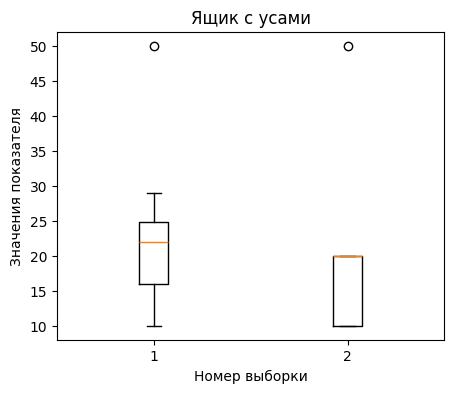

In [9]:
set_graph_size(5, 4)

# функция boxplot()
plt.boxplot([series_intervals, series_X])  # на входе может быть одномерный ряд или список рядов

plt.ylabel("Значения показателя")  # подпись к оси Y
plt.xlabel("Номер выборки")  #
plt.title("Ящик с усами");

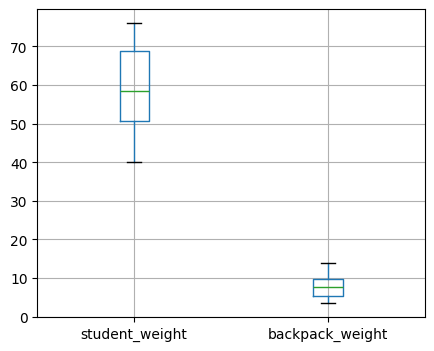

In [20]:
# метод DataFrame.boxplot()
student_backpacks_df.boxplot();

### Построение средствами **seaborn**

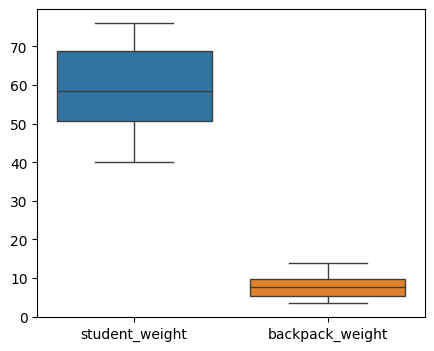

In [21]:
sns.boxplot(
    # [series_intervals, series_X]
    student_backpacks_df);

**7. График долей** (круговая диаграмма, pie chart).

<img src="https://i.ibb.co/g6fmwz7/1.png" width=200>

Такой вид диаграммы демонстрирует, какую часть та или иная категория занимает в составе целого.

<img src="https://i.ibb.co/DVLsF9R/1.png" width=400>

### Функция **pie()** (библиотека matplotlib)

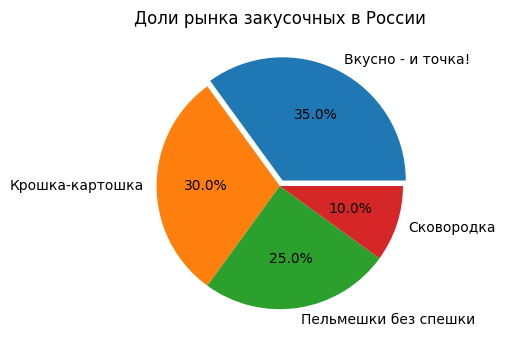

In [10]:
plt.pie([0.35, 0.3, 0.25, 0.1],  # доли
        labels=["Вкусно - и точка!", "Крошка-картошка", "Пельмешки без спешки", "Сковородка"],
        autopct="%1.1f%%",  # формат текстовой метки внутри доли
        explode=[0.05, 0, 0, 0]  # часть долей будет вынесена из диаграммы на заданное расстояние
        )
plt.title("Доли рынка закусочных в России");

In [ ]:
series_intervals.value_counts(bins=3, normalize=True)

(9.959000000000001, 23.333]    0.571429
(23.333, 36.667]               0.357143
(36.667, 50.0]                 0.071429
dtype: float64

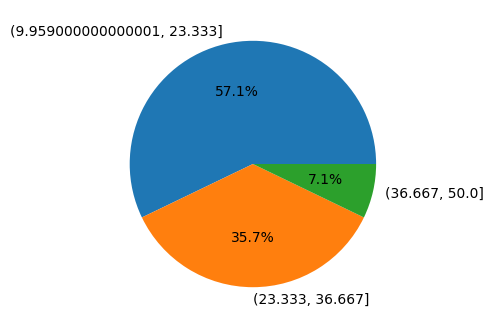

In [ ]:
plt.pie(series_intervals.value_counts(bins=3, normalize=True),  # доли
        labels=series_intervals.value_counts(bins=3, normalize=True).index,
        autopct="%1.1f%%",  # формат текстовой метки внутри доли
        );

**8. Скрипичная диаграмма** (violin plot).

Эта диаграмма представляет собой «ящик с усами» (boxplot) и наложенный на него зеркально слева и справа повернутый график функции плотности вероятности.
Сравнение скрипичных графиков для фактических и модельных данных позволит сделать вывод о том, насколько различаются распределения модельных и фактических данных.

<img src="https://i.ibb.co/3MrVZxC/1.png" width=400>


### Функция **violinplot()** (библиотека seaborn)

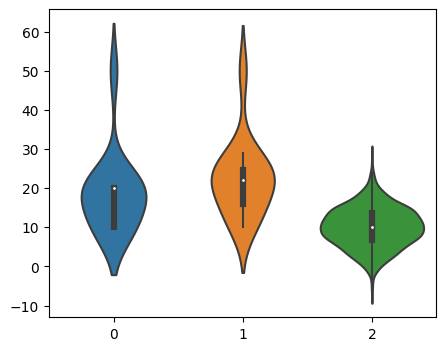

In [ ]:
# скрипичная диаграмма для трех выборок
sns.violinplot([series_X, series_intervals, norm_sample]);

**9. Тепловая карта** (heatmap).

Эта диаграмма позволяет отображать индивидуальные значения в ячейках таблицы при помощи цветовой индикации.

<img src="https://seaborn.pydata.org/_images/heatmap_9_0.png" width=500>

### Функция **heatmap()** (библиотека seaborn)

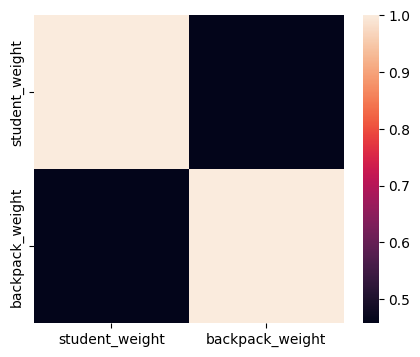

In [ ]:
sns.heatmap(student_backpacks_df.corr());

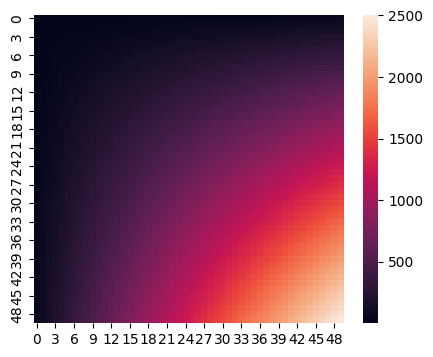

In [ ]:
# матрицей может быть как таблица (датафрейм, numpy-массив), так и список списков
sns.heatmap([[line * col for col in range(1, 51)] for line in range(1, 51)],
            annot=False,  # отобразить значения в ячейках
            );

### Расположение нескольких графиков (холстов) рядом

### Функция **subplot()**

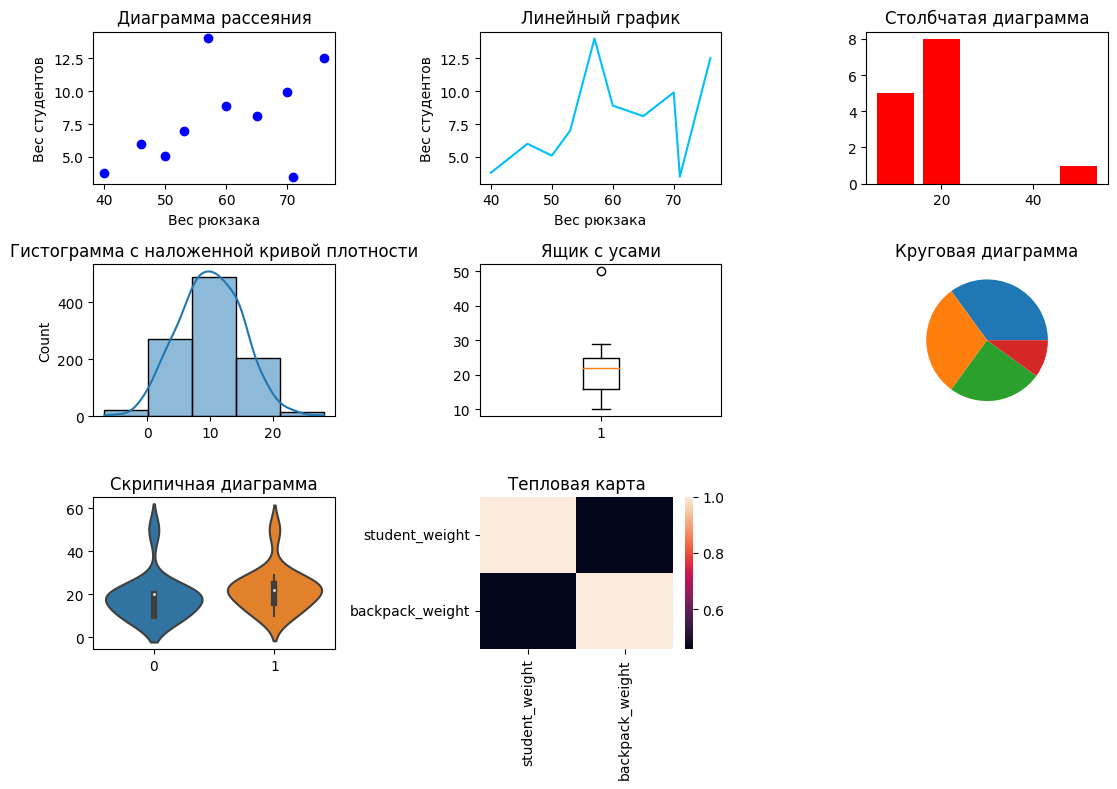

In [ ]:
set_graph_size(11, 8)

plt.subplot(3, 3, 1)  # сетка 3 на 3, график 1
plt.scatter(x=student_backpacks_df.student_weight,
            y=student_backpacks_df.backpack_weight, color="blue")
plt.ylabel("Вес студентов")
plt.xlabel("Вес рюкзака")
plt.title("Диаграмма рассеяния")

plt.subplot(3, 3, 2)  # сетка 3 на 3, график 2
plt.plot(student_backpacks_df.student_weight,
         student_backpacks_df.backpack_weight, color="deepskyblue")
plt.ylabel("Вес студентов")
plt.xlabel("Вес рюкзака")
plt.title("Линейный график");

plt.subplot(3, 3, 3)  # сетка 3 на 3, график 3
plt.bar(series_X.value_counts().index, height=series_X.value_counts(),
        width=8, color="red")
plt.title("Столбчатая диаграмма");

plt.subplot(3, 3, 4)  # сетка 3 на 3, график 4
sns.histplot(norm_sample, bins=5, kde=True)
plt.title("Гистограмма с наложенной кривой плотности")

plt.subplot(3, 3, 5)  # сетка 3 на 3, график 5
plt.boxplot(series_intervals)
plt.title("Ящик с усами")

plt.subplot(3, 3, 6)  # сетка 3 на 3, график 6
plt.pie([0.35, 0.3, 0.25, 0.1])
plt.title("Круговая диаграмма")

plt.subplot(3, 3, 7)  # сетка 3 на 3, график 7
sns.violinplot([series_X, series_intervals]);
plt.title("Скрипичная диаграмма")

plt.subplot(3, 3, 8)  # сетка 3 на 3, график 8
sns.heatmap(student_backpacks_df.corr());
plt.title("Тепловая карта")

plt.tight_layout();  # это чтобы надписи друг на друга не наезжали